# Degeneración del 99

O como la existencia del Reggaeton amenaza con degenerar la lengua castellana.
Está claro que estoy exagerando.

In [ ]:
%pip install lyricsgenius


In [18]:
import lyricsgenius

genius = lyricsgenius.Genius('**********************************************************************')

# Opciones
genius.verbose = True # Quitamos mensajes de estado
genius.remove_section_headers = True # Quitamos las anotaciones de las letras
genius.skip_non_songs = False # Solo nos interesan aberraciones sónicas
genius.excluded_terms = ["(Remix)", "(Live)"] # No queremos vainas más raras

artist = genius.search_artist("Bad Bunny", max_songs=30, sort="title", include_features=False)
print(artist.songs)
artist.save_lyrics(overwrite=True)

Searching for songs by Bad Bunny...

Song 1: "120"
Song 2: "200 MPH"
Song 3: "200 Mph (Live)"
Song 4: "25/8"
Song 5: "25/8 (Versión Extendida)"
Song 6: "﹤3"
Song 7: "6 Rings"
Song 8: "Alta Moda*"
Song 9: "Amorfoda"
Song 10: "Another (Freestyle)"
Song 11: "ANTES QUE SE ACABE"
Song 12: "A Tu Merced"
Song 13: "Baby Tú Me Gustas*"
Song 14: "Bad Bunny: Problemas de un niño normal"
Song 15: "BENDICIONES"
Song 16: "BOOKER T"
Song 17: "BYE ME FUI"
Song 18: "Calentando (Freestyle)"
Song 19: "Caro"
Song 20: "Caro (Live)"
Song 21: "Chambea"
Song 22: "Como Antes"
Song 23: "Como Yo No Hay 2"
Song 24: "COMPOSITOR DEL AÑO"
Song 25: "Contigo"
Song 26: "Cuando Perriabas"
Song 27: "CYNH2"
Song 28: "Desde el Corazón"
Song 29: "Diles"
Song 30: "Dime Si Te Acuerdas"

Reached user-specified song limit (30).
Done. Found 30 songs.
[Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ..

## Canciones de Bad Bunny

Para nuestra desgracia, debíamos descargar canciones de este "Artista". 
Hemos seleccionado un listado de 30, la probre API de genius no daba para más.

## ¿Y Ahora Qué?

Más sufrimiento, nos toca analizar a Bá Buni un poco.

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib



In [62]:
import numpy as np
import pandas as pd
import json


def get_random_badbunny_sentence(data):
    
    while True:
        i = int(random.uniform(0, len(data['songs']) - 1)) # Song index
        cancion_split = data['songs'][i]['lyrics'].split('\n')
        cancion_split = [s for s in cancion_split if s]
        j = 0
        if len(cancion_split) <= 2:
            continue
        # END
        j = int(random.uniform(0, len(cancion_split) - 1))
        # print("CANCION: ", cancion_split)
        # print("INFO: ", j, len(cancion_split), cancion_split[j])
        return cancion_split[j]
    # END
# END

lyrics_file = 'Lyrics_BadBunny.json'

with open(lyrics_file) as lyrics_json:
    data = json.load(lyrics_json)
# END

print(get_random_badbunny_sentence(data))

# print(data)

Voy a vivir mi vida, si me muero e' contento (Dale, dale)


In [ ]:
%pip install nltk

In [3]:
# Codigo simplificado a partir de https://github.com/johnwmillr/trucks-and-beer/blob/master/word_frequencies.ipynb
import nltk

nltk.download('stopwords')

from string import punctuation
from nltk.corpus import stopwords

punctuation = "".join([symbol for symbol in punctuation if symbol not in ["'", '"']])
punctuation += '–'

def clean_str(s):
    return s.translate(str.maketrans('', '', punctuation)).replace('\u200b', " ").strip().lower()
# END

def tokenize(txt):
    stop_words = set(stopwords.words('spanish'))
    word_list = [w for w in clean_str(txt).split() if w not in stop_words]
    # word_list = [w for w in clean_str(txt).split()]
    return word_list
# END

freqs, total_words = [], []
lyrics_list = []
for song in data['songs']:
    lyrics_list.append(song['lyrics'])
# END
print(len(lyrics_list))
# title = song['title']
# letras = song['lyrics']

token_lists = list(map(tokenize, lyrics_list))
# print(token_lists)

tokens = [w for song in token_lists for w in song]
# print(tokens)

freqs.append(nltk.FreqDist(tokens))
# Esto es del total de palabras que no sean stopwords. 
# Al final, las conjunciones se deberian ignorar porque son un minimo necesario para que la lengua se considere 'Español'
# Bueno, solo las conjunciones debidamente formadas y aceptadas por la RAE que no están sobredenigradas intencionadamente.

total_words = len(tokens)
print(total_words)
dist = freqs[0]
print(dist)
print(freqs)
# END

30
5712
<FreqDist with 2293 samples and 5712 outcomes>
[FreqDist({'ey': 149, "pa'": 84, 'si': 83, 'yeh': 80, 'eh': 75, 'siempre': 56, "to'": 51, 'cabrón': 42, "e'": 41, 'baby': 41, ...})]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


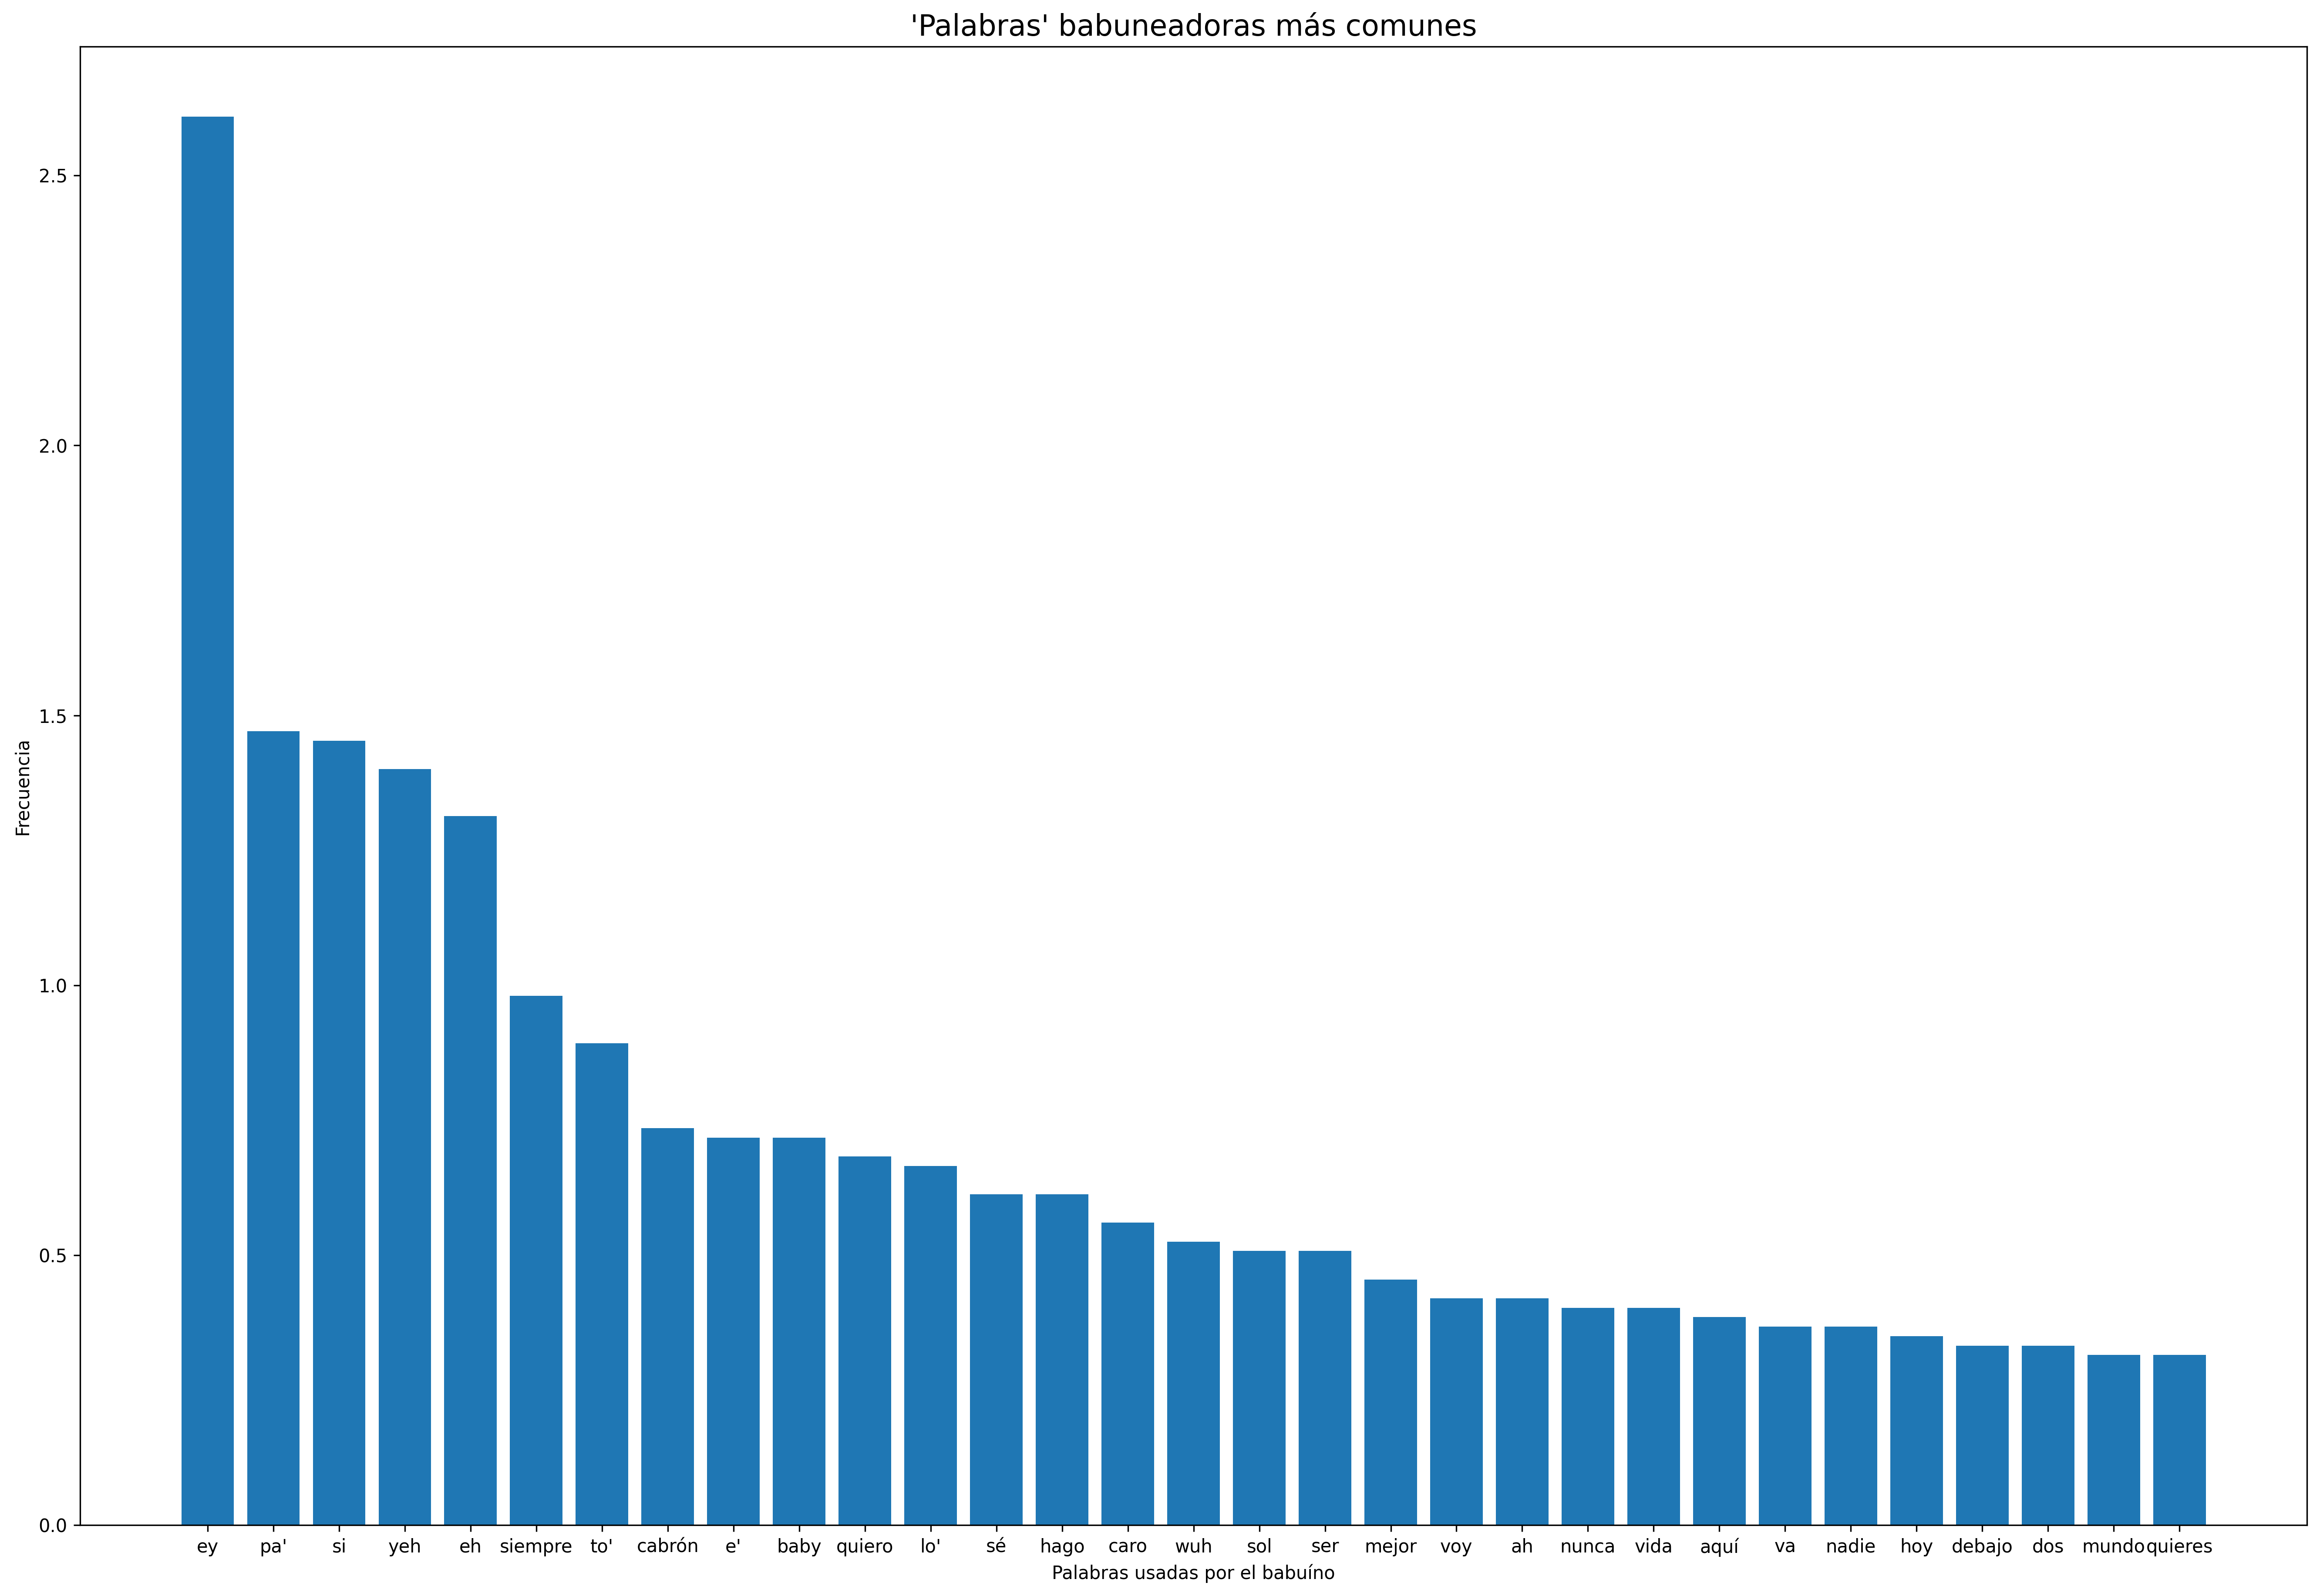

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

num_words = 30

X = []
Y = []

for word in dist:
    X.append(word)
    # print(word, dist[word])
    Y.append((dist[word]/total_words)*100)
    if num_words == 0:
        break
    # END
    num_words -= 1
# END



figure(figsize=(22, 15), dpi=300)

plt.bar(X, Y)
plt.title('\'Palabras\' babuneadoras más comunes', fontsize=16)
plt.xlabel('Palabras usadas por el babuíno')
plt.ylabel('Frecuencia')
plt.show()

plt.savefig('palabras_babuino.png')


Leer, leer, leer, vivir la vida
que otros soñaron.
Leer, leer, leer, el alma olvida
las cosas que pasaron.
Se quedan las que quedan, las ficciones,
las flores de la pluma,
las solas, las humanas creaciones,
el poso de la espuma.
Leer, leer, leer; ¿seré lectura
mañana también yo?
¿Seré mi creador, mi criatura,
seré lo que pasó?
395
<FreqDist with 319 samples and 395 outcomes>
[FreqDist({'leer': 9, 'luna': 6, 'vida': 5, 'cielo': 5, 'media': 5, 'cuna': 4, 'tierra': 4, 'aire': 3, 'niã±o': 3, 'lengua': 3, ...})]


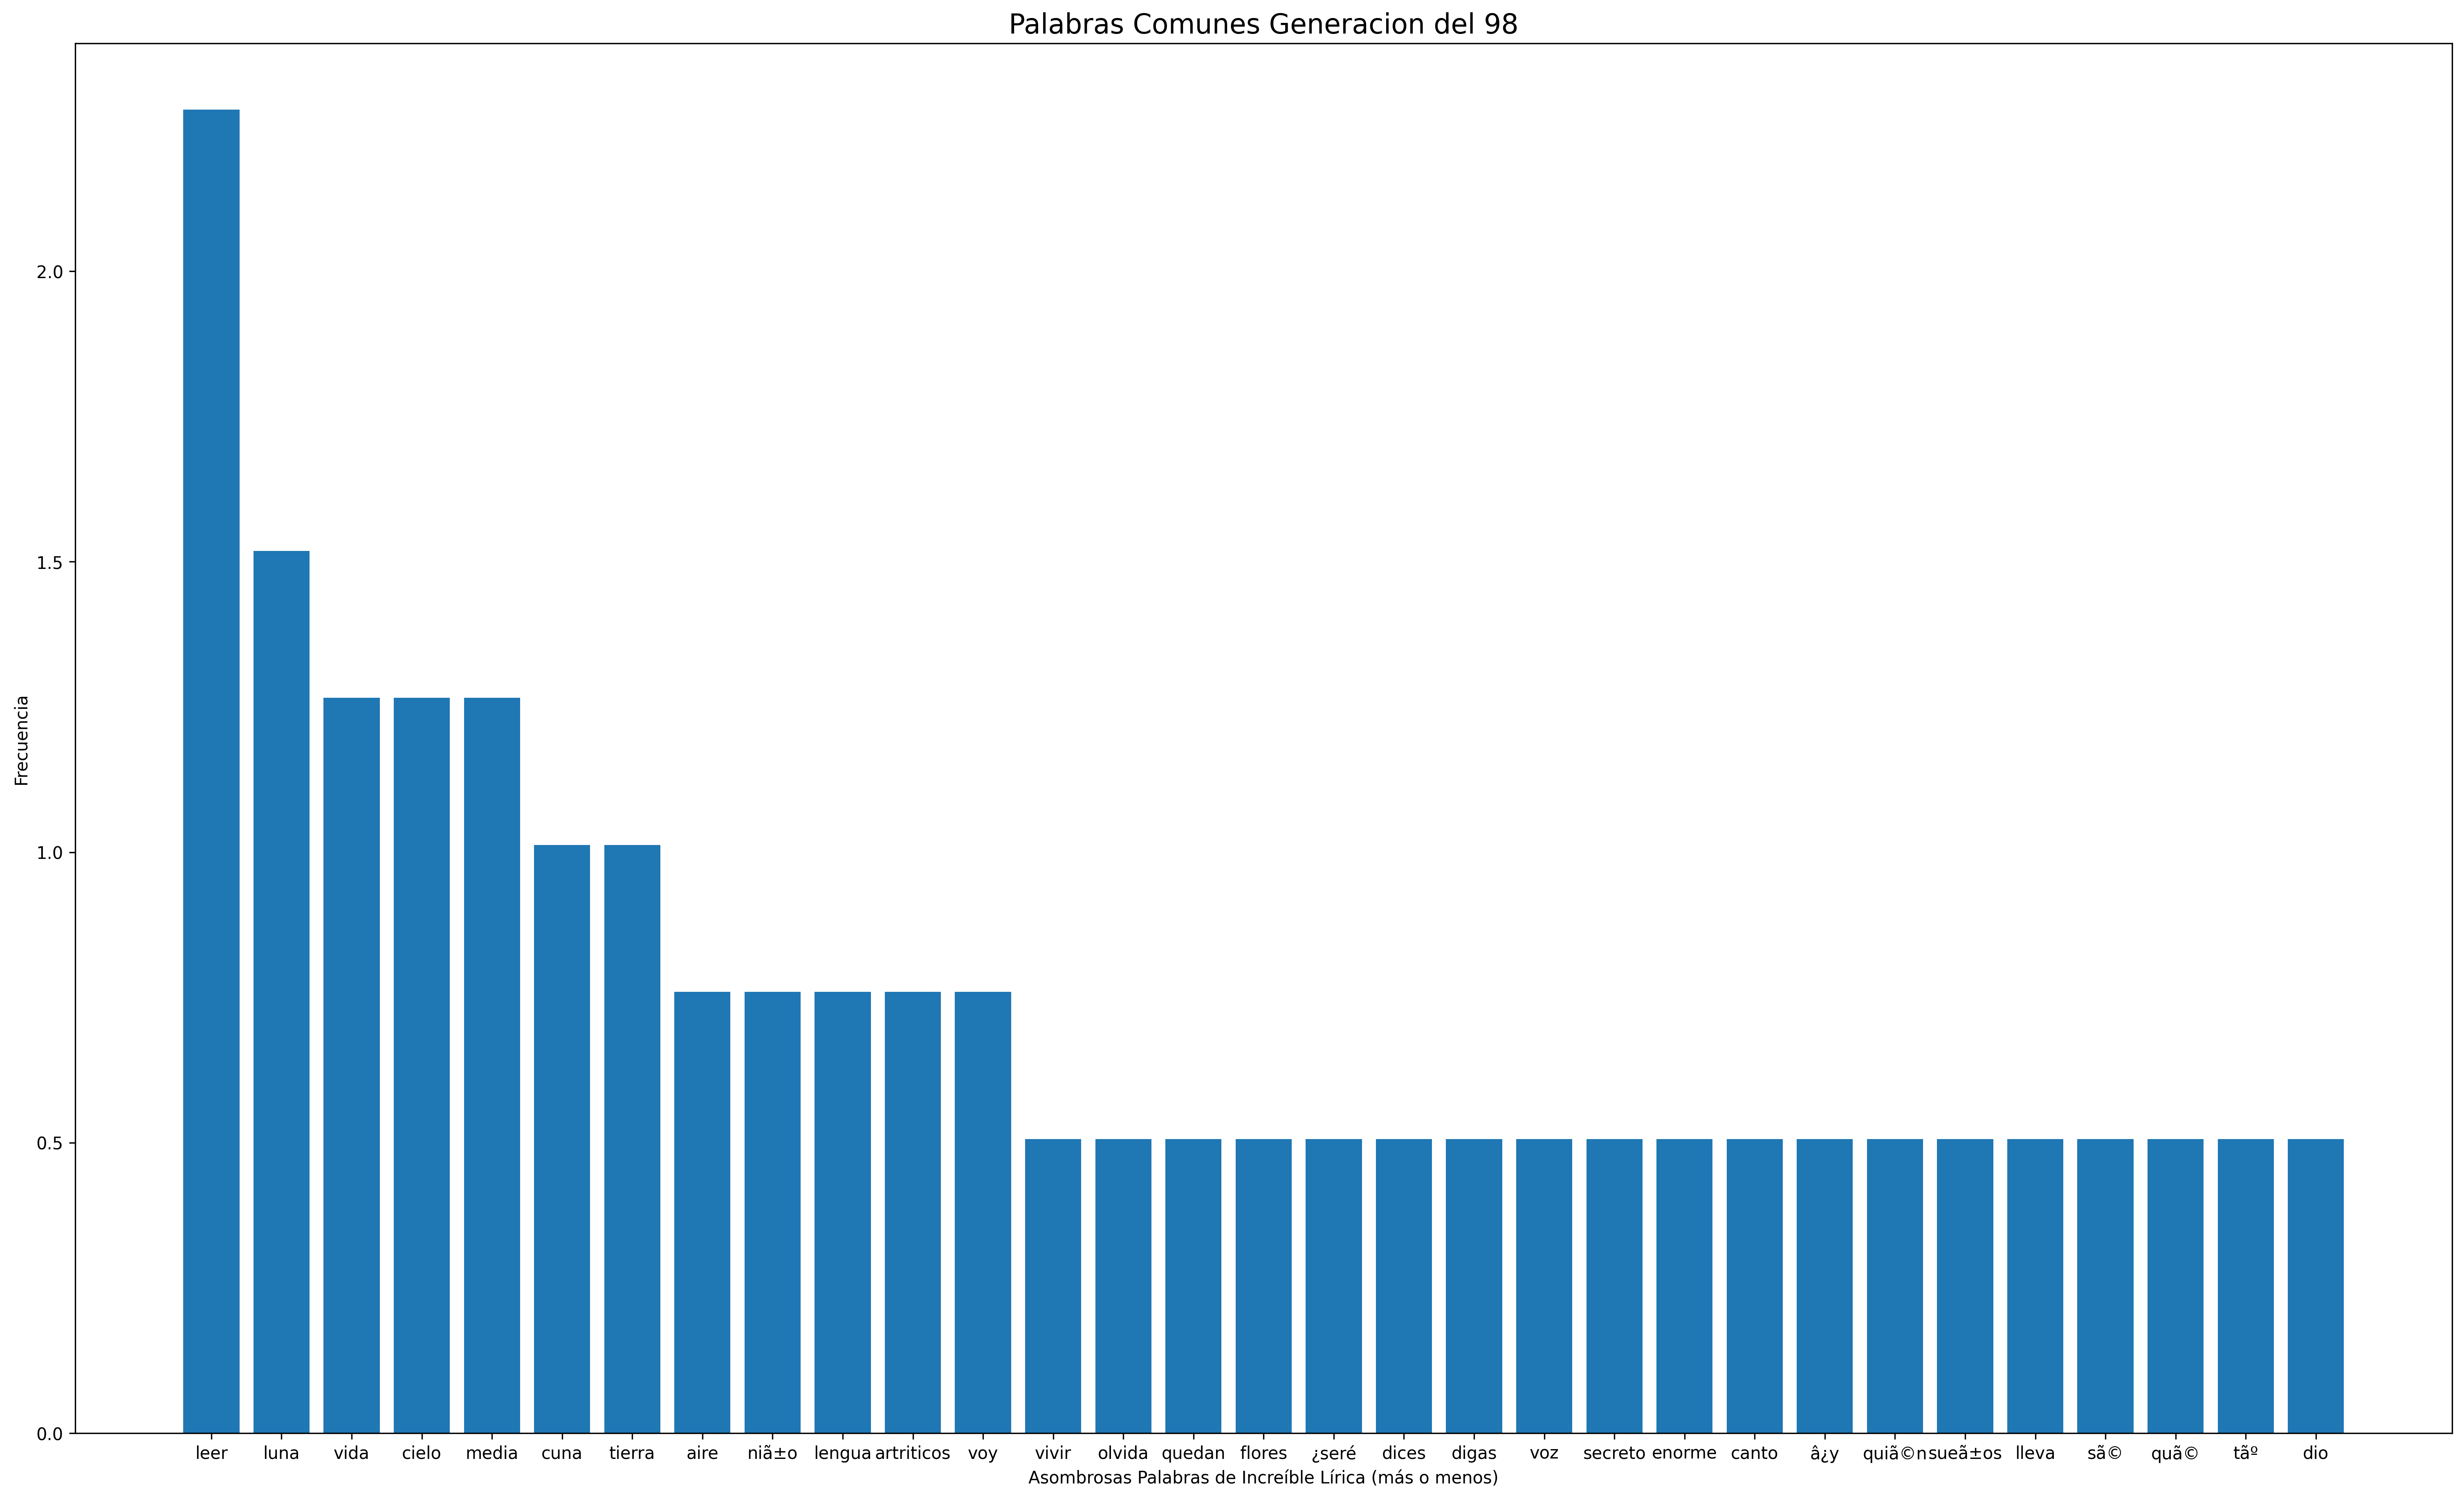

<Figure size 432x288 with 0 Axes>

In [6]:
poems_file = 'generacion98.json'

with open(poems_file, encoding='utf8') as poems_json:
    data_poems = json.load(poems_json)
# END

print(data_poems['poemas'][0]['texto'])

freqs_poems, total_words_poems = [], []
poems_list = []
for poema in data_poems['poemas']:
    poems_list.append(poema['texto'])
# END

token_lists_poems = list(map(tokenize, poems_list))

tokens_poems = [w for poem in token_lists_poems for w in poem]

freqs_poems.append(nltk.FreqDist(tokens_poems))
# Esto es del total de palabras que no sean stopwords. 
# Al final, las conjunciones se deberian ignorar porque son un minimo necesario para que la lengua se considere 'Español'
# Bueno, solo las conjunciones debidamente formadas y aceptadas por la RAE que no están sobredenigradas intencionadamente.

total_words_poems = len(tokens_poems)
print(total_words_poems)
dist_poems = freqs_poems[0]
print(dist_poems)
print(freqs_poems)


num_words = 30

XP = []
YP = []

for word in dist_poems:
    XP.append(word)
    # print(word, dist[word])
    YP.append((dist_poems[word]/total_words_poems)*100)
    if num_words == 0:
        break
    # END
    num_words -= 1
# END



figure(figsize=(25, 15), dpi=300)

plt.bar(XP, YP)
plt.title('Palabras Comunes Generacion del 98', fontsize=16)
plt.xlabel('Asombrosas Palabras de Increíble Lírica (más o menos)')
plt.ylabel('Frecuencia')
plt.show()

plt.savefig('palabras_98.png')



In [86]:
import random
from operator import attrgetter

def calculate_fit(sols):
    total_fit = 0.0
    for sol in sols:
        # X es el diccionario que contiene las palabras de babuino
        if sol in dist:
            total_fit += 1 - dist[sol] / total_words
        else:
            total_fit += 5 + dist_poems[sol] / total_words_poems
        # END
    # END
    return total_fit
# END

class Genome:

    def __init__(self, sol, fit=0.0, fun=calculate_fit):
        """
        Parametros
        -----------
        sol : list
            lista de palabras que conforman las soluciones
        fit : float, optional
            valor del fitness, si es pasado y es 0, produce automáticamente un valor de la función
        fun : function()
            si es necesario, función objetivo usada para calcular el fitness
        """
        self.sol = sol
        self.fun = fun
        if fit == 0.0:
            self.fit = self.fun(sol) # Calculamos automaticamente el fit
        # END
    # END

    def __str__(self):
        return "G(f=" + str(self.fit) + "; " + str(self.sol) + ")"
    # END
# END


class Population:

    def __init__(self, genomes=[]):
        self.genomes = genomes
    # END

    def append(self, new_genome):
        self.genomes.append(new_genome)
    #END

    def __str__(self):
        return "P(" + '\n'.join(map(str, self.genomes)) + ")"
    # END

    def sort(self):
        """
        Este método ordena la población de genomas en orden ascendente según el valor de fitness
        de cada genoma
        """
        self.genomes = sorted(self.genomes, key=lambda genome: genome.fit)
    # END

    def avg(self):
        return sum([g.fit for g in self.genomes]) / len(self.genomes)
    # END

    def len(self):
        return len(self.genomes)
    # END

    def to_file(self, it):
        filename = "generations/generation_" + str(it) + ".txt"
        with open(filename, 'w') as gen_file:
            txt = ""
            for g in self.genomes:
                txt += "\n" + ' '.join(g.sol)
            # END
            gen_file.write(txt)
    # END

# END

# Operador de Seleccion Tipo Ruleta
class RouletteSelection():

    def apply(self, population, i=0):

        sum_fitness = sum([g.fit for g in population.genomes], 0)
        prob = random.uniform(0, sum_fitness)

        idx = 0
        for g in population.genomes:
            sum_fitness += g.fit
            if prob < sum_fitness:
                return (g, idx)
            idx += 1
        return None
    # END
# END

class TwoPointCrossover():

    def apply(self, genomes):
        father = genomes[0]
        mother = genomes[1]
        parents = list(zip(father.sol, mother.sol))
        fa_genome_sz = len(father.sol)
        mo_genome_sz = len(mother.sol)
        if not fa_genome_sz > 2 or not mo_genome_sz > 2:
            return [father, mother]
        # Como minimo hay que partir en las posiciones marcadas con "|"
        # [ 0 | 0 0 0 0 0 0 0 0 0 0 | 0]
        # Nos aseguramos de que los rangos no incluyan al primer y ultimo elemento
        A = random.randint(2, fa_genome_sz - 1) 
        B = random.randint(2, mo_genome_sz - 1)

        # nos aseguramos de que B siempre sea el mayor de los dos indices
        tmp = A
        if A > B:
            A = B
            B = tmp
        # Nos aseguramos de que al menos haya un elemento entre ambos
        elif A == B:
            if B == fa_genome_sz - 1:
                A -= 1
            elif B == 2:
                B += 1
            # END
        # END

        idxs = [A, B]
        father_split = [father.sol[i:j] for i, j in zip([0]+idxs, idxs+[None])]
        mother_split = [mother.sol[i:j] for i, j in zip([0]+idxs, idxs+[None])]

        sol_X = father_split[0] + mother_split[1] + father_split[2]
        sol_Y = mother_split[0] + father_split[1] + mother_split[2]
        X = Genome(sol_X, fun=father.fun)
        Y = Genome(sol_Y, fun=mother.fun)
        return [X, Y]
    # END
# END

class BabuinoMutation():

    # Este big brain algo roba una palabra del reggaeton y denigra el castellano
    # Consiste en añadir un cromosoma extra del Reggaeton en el poema

    def apply(self, genome_list):

        genome = genome_list[0]
        i = int(random.uniform(0, len(genome.sol) - 1))
        j = int(random.uniform(0, len(dist) - 1))
        babuni_word = list(dist)[j]
        new_genome_sol = genome.sol[:i]
        new_genome_sol.append(babuni_word) # Insertamos cromosoma extra en posicion elegida
        for s in genome.sol[i + 1:]:
            new_genome_sol.append(s)
        # END
        return genome
    # END
# END

class BadBunnyReplacement():

    def apply(self, original_pop, replacement_pop):

        # La idea aqui es sustituir una linea del poema por una linea de alguna aberracion sonica 
        # de bad bunny

        original_pop.sort()
        original_pop.genomes[len(original_pop.genomes) - 1] = replacement_pop.genomes[0]
        # i = int(random.uniform(0, 99))
        # if i >= 50:
        #     original_pop.genomes = original_pop.genomes[:len(original_pop.genomes) - 1]
        # END
        return original_pop
    # END
# END



class EA(object):

    def __init__(self, minfun, new_population):
        super(EA, self).__init__()
        self.minfun = minfun
        self.pop = new_population
        self.psize = self.pop.len()
        self.bestGenome = None
        self.generation_avgs = []

    # @max_its = numero maximo de iteraciones
    def run(self, max_its=10):
        
        curr_its = max_its

        print("Original Population (size=%d, avg=%f): %s" %
              (self.psize, self.pop.avg(), self.pop))

        while curr_its > 0:

            print("\n\nIteration #%d\n\n" % (max_its - curr_its))

            # Ejecutar Operadores
            # 1) Seleccion
            print("================SELECTION================")
            sel_gene, sel_idx = RouletteSelection().apply(self.pop)
            print("%d :: %s" % (sel_idx, str(sel_gene)))
            sel_gene_two, sel_idx_two = RouletteSelection().apply(self.pop)
            print("%d :: %s" % (sel_idx_two, str(sel_gene_two)))

            # 2) Crossover
            print("================CROSSOVER================")

            list_genes = TwoPointCrossover().apply(genomes=[sel_gene, sel_gene_two])

            print("X-Child = %s" % str(list_genes[0]))
            print("Y-Child = %s" % str(list_genes[1]))

            # 3) Mutacion
            print("================MUTATION================")

            list_genes[0] = BabuinoMutation().apply(genome_list=[list_genes[0]])
            list_genes[1] = BabuinoMutation().apply(genome_list=[list_genes[1]])

            best_child = min(list_genes, key=attrgetter('fit'))
            print("Best Mutated Child := %s" % str(best_child))

            # 4) Replacement
            print("================REPLACEMENT================")

            # replacement_pop = Population(genomes=[best_child])
            new_genome = Genome(sol=get_random_badbunny_sentence(data).split(), fun=calculate_fit)
            replacement_pop = Population(genomes=[new_genome])
            new_pop = BadBunnyReplacement().apply(self.pop, replacement_pop)

            self.pop = new_pop
            curr_its -= 1
            self.generation_avgs.append(self.pop.avg())
            print("Average fitness at end of iteration: %f" % self.pop.avg())
            self.pop.to_file(curr_its)
        # END WHILE
        self.pop.sort()
        self.bestGenome = self.pop.genomes[0]
    # END

    def best(self):
        return self.bestGenome
    # END
# END

Original Population (size=42, avg=21.118801): P(G(f=15.0; ['El', 'guitarrista', 'aparece'])
G(f=20.0; ['circunspecto', 'en', 'el', 'tablado,'])
G(f=30.0; ['y', 'se', 'sienta', 'en', 'una', 'silla'])
G(f=15.0; ['con', 'poco', 'desembarazo;'])
G(f=25.0; ['el', 'cantador,', 'cerca', 'de', 'Ã©l,'])
G(f=25.996323529411764; ['va', 'a', 'colocarse', 'en', 'un', 'banco,'])
G(f=20.99964985994398; ['y', 'con', 'una', 'vara', 'corta'])
G(f=21.99964985994398; ['que', 'lleva', 'a', 'la', 'diestra', 'mano'])
G(f=25.0; ['a', 'su', 'manera,', 'sin', 'duda,'])
G(f=15.996323529411764; ['va', 'los', 'compases', 'marcando.'])
G(f=20.0; ['El', 'guitarrista', 'es', 'cetrino,'])
G(f=20.0; ['moreno,', 'peludo', 'y', 'flaco.'])
G(f=25.0; ['El', 'cantador', 'es', 'un', 'gordo'])
G(f=16.99964985994398; ['con', 'cierto', 'aire', 'de', 'gitano.'])
G(f=15.0; ['Comienzan', 'las', 'florituras,'])
G(f=15.0; ['los', 'arpegios', 'complicados,'])
G(f=30.0; ['en', 'la', 'guitarra,', 'y', 'de', 'pronto,'])
G(f=20.999649859

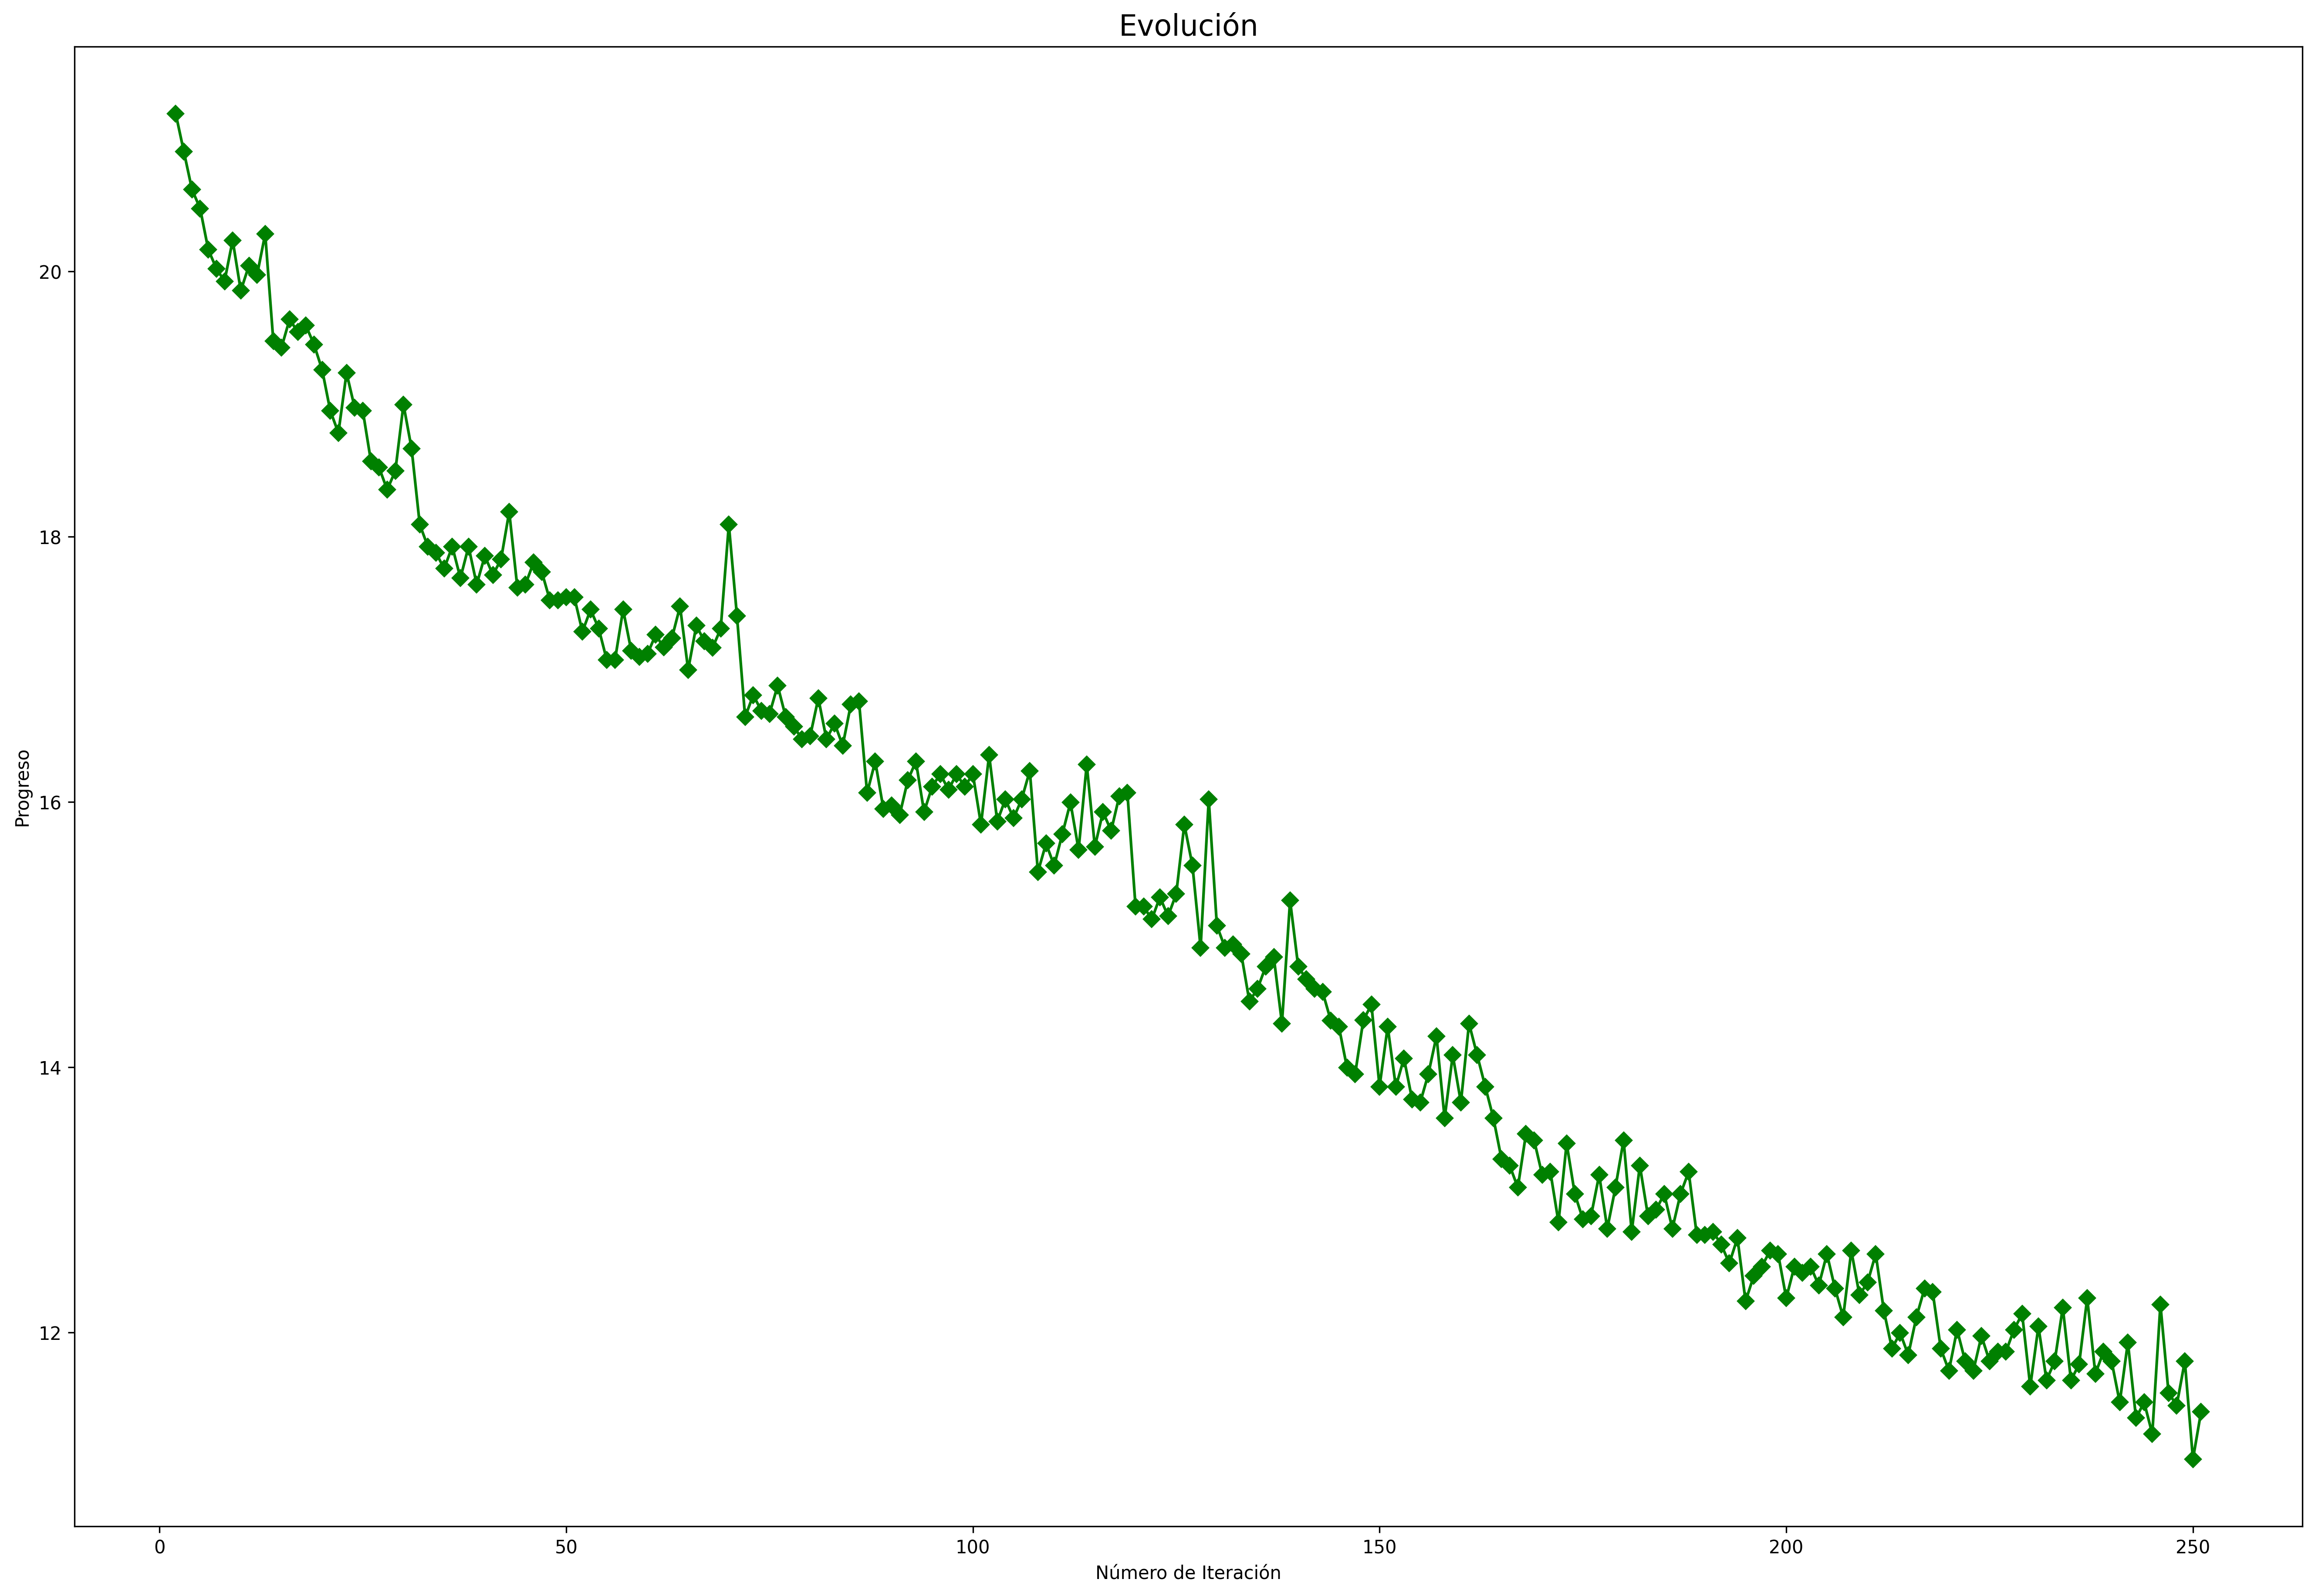

<Figure size 432x288 with 0 Axes>

In [87]:
with open('poema.txt') as poema_file:
    lines = poema_file.readlines()
    # print(lines)
    autor = lines[0].strip()
    titulo = lines[1].strip()
    poem = lines[2:]
    # poem = ''.join(lines[2:])
    # # print(poem)
    # dict = {
    #     "autor": author,
    #     "title": title,
    #     "texto": poem
    # }

    # print(json.dumps(dict,indent=4))

# END

poblacion = Population(genomes=[])
for ln in poem:
    sol = ln.split()
    poblacion.append(Genome(sol, fun=calculate_fit))
# END

# print(str(poblacion))

myEA = EA(calculate_fit, new_population=poblacion)
myEA.run(250)
bestGenome = myEA.best()
print(str(bestGenome))
print(myEA.generation_avgs)
print(poblacion)
Xs = []
Ys = []
with open("results.csv", "w") as output:
    it = 1
    for avg in myEA.generation_avgs:
        output.write("%d,%s\n" % (it, avg))
        it += 1
        Xs.append(it)
        Ys.append(avg)
    # END
# END
figure(figsize=(22, 15), dpi=300)

plt.plot(Xs, Ys, '-gD')
plt.title('Evolución', fontsize=16)
plt.xlabel('Número de Iteración')
plt.ylabel('Progreso')
plt.show()
plt.savefig('evolucion_fitness.png')